# Real estate price prediction
## by Institut Louis Bachelier

In [1]:
# https://challengedata.ens.fr/challenges/68

### Import library

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import zipfile
import cv2
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding

### Training data set


In [37]:

X_train = pd.read_csv("C:/Users/modfa/Documents/NEOMA/Machine Learning and AI/Group Project/data/X_train_J01Z4CN.csv",
                     sep = ';', index_col = 'id_annonce')

y_train = pd.read_csv("C:/Users/modfa/Documents/NEOMA/Machine Learning and AI/Group Project/data/y_train_OXxrJt1.csv",
                     sep = ',', index_col = 'id_annonce')



In [38]:
X_train.shape

(37368, 26)

In [213]:
X_train.head()

,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,energy_performance_category,...,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,city_tranforme
id_annonce,,,,,,,,,,,,,,,,,,,,,
35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,NaN,...,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Banlieue
35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,D,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banlieue
35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,NaN,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banlieue
35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,D,...,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Banlieue
35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,NaN,...,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Banlieue


In [215]:
X_train['property_type'].value_counts()

appartement          15733
maison               15675
divers                2137
terrain               1534
villa                  781
propriété              408
terrain à bâtir        298
duplex                 220
viager                 177
ferme                  130
parking                 96
loft                    54
chalet                  48
château                 21
moulin                  17
manoir                  15
péniche                  8
hôtel particulier        6
chambre                  4
gîte                     3
atelier                  2
hôtel                    1
Name: property_type, dtype: int64

In [217]:
len(X_train['property_type'].unique())

22

In [218]:
X_train['property_type'].unique()

array(['appartement', 'maison', 'propriété', 'divers', 'duplex',
       'terrain', 'villa', 'viager', 'terrain à bâtir', 'ferme',
       'parking', 'moulin', 'loft', 'manoir', 'chalet', 'péniche',
       'atelier', 'château', 'chambre', 'gîte', 'hôtel particulier',
       'hôtel'], dtype=object)

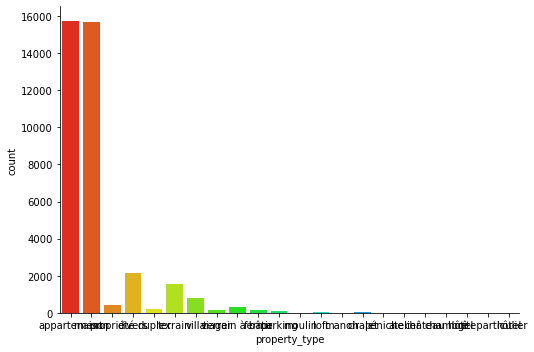

In [214]:
sns.factorplot(x = 'property_type', data = X_train, kind = 'count', aspect= 1.5, palette = 'gist_rainbow' )

In [245]:
X_train.head(3)

,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,energy_performance_category,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
id_annonce,,,,,,,,,,,,,,,,,,,,,
35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,NaN,...,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,D,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,NaN,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y_train.head(3)

,price
id_annonce,
35996577,355000.0
35811033,190000.0
35731841,39000.0


### Testing data set

In [5]:

X_test = pd.read_csv("C:/Users/modfa/Documents/NEOMA/Machine Learning and AI/Group Project/data/X_test_BEhvxAN.csv",
                     sep = ';', index_col = 'id_annonce')

y_test = pd.read_csv("C:/Users/modfa/Documents/NEOMA/Machine Learning and AI/Group Project/data/y_random_MhJDhKK.csv",
                     sep = ';', index_col = 'id_annonce')

In [246]:
X_test.shape

(9339, 26)

In [220]:
X_train['postal_code'].value_counts()

34000    274
75018    242
75017    230
6400     217
75016    210
        ... 
9460       1
50690      1
12720      1
46170      1
14960      1
Name: postal_code, Length: 4726, dtype: int64

In [222]:
list(X_train['city'].unique())

['villeneuve-loubet',
 'venissieux',
 'moutiers',
 'cordemais',
 'lyon-7eme',
 'chilly-mazarin',
 'neuilly-sur-seine',
 'quemper-guezennec',
 'canet-en-roussillon',
 'locmaria-plouzane',
 'rennes',
 'pontoise',
 'saint-jouvent',
 'frontignan',
 'paris-15eme',
 'paris-19eme',
 'theoule-sur-mer',
 'urrugne',
 'rosny-sous-bois',
 'preignac',
 'saint-brieuc',
 'vendome',
 'marly-la-ville',
 'lourches',
 'huelgoat',
 'tourville-la-riviere',
 'meaux',
 'les-echelles',
 'la-roche-posay',
 'beauvais',
 'berck',
 'luc-sur-orbieu',
 'nimes',
 'toulouse',
 'saint-genis-pouilly',
 'colombes',
 'ajaccio',
 'sauvigny-les-bois',
 'gournay-sur-marne',
 'mougins',
 'sarralbe',
 'hyeres',
 'bagnols-sur-ceze',
 'le-beausset',
 'livry-gargan',
 'carpentras',
 'bordeaux',
 'saint-brice-sous-foret',
 'evry',
 'saint-germain-de-la-coudre',
 'six-fours-les-plages',
 'garches',
 'villeneuve-les-avignon',
 'paris-20eme',
 'paris-16eme',
 'thonon-les-bains',
 'villepinte',
 'marseille-14eme',
 'die',
 'bussy-sai

In [7]:
X_test.head(3)

,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,energy_performance_category,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
id_annonce,,,,,,,,,,,,,,,,,,,,,
35160615,maison,49.37167,3.533991,brenelle,2220,143.0,NaN,800.0,299.0,E,...,0.0,1.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35830639,propriété,49.03719,-0.982385,torigni-sur-vire,50160,470.0,NaN,28559.0,NaN,NaN,...,0.0,1.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
36016657,appartement,47.09718,6.149253,ornans,25290,135.0,NaN,NaN,NaN,NaN,...,0.0,0.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [8]:
y_test.head(3)

,price
id_annonce,
35160615,441826.270071
35830639,887845.560585
36016657,839651.416415


### Data Exploration and features engineering

In [247]:
X_train.columns

Index(['property_type', 'approximate_latitude', 'approximate_longitude',
       'city', 'postal_code', 'size', 'floor', 'land_size',
       'energy_performance_value', 'energy_performance_category', 'ghg_value',
       'ghg_category', 'exposition', 'nb_rooms', 'nb_bedrooms', 'nb_bathrooms',
       'nb_parking_places', 'nb_boxes', 'nb_photos', 'has_a_balcony',
       'nb_terraces', 'has_a_cellar', 'has_a_garage', 'has_air_conditioning',
       'last_floor', 'upper_floors'],
      dtype='object')

In [7]:
df_categorie_features = X_train[cat_features]
df_categorie_features.head(5)

,property_type,city,energy_performance_category,ghg_category,exposition
id_annonce,,,,,
35996577,appartement,villeneuve-loubet,NaN,NaN,NaN
35811033,appartement,venissieux,D,E,NaN
35731841,maison,moutiers,NaN,NaN,Sud
35886765,maison,cordemais,D,E,NaN
35781137,appartement,lyon-7eme,NaN,NaN,NaN


In [60]:
#list(df_categorie_features['city'].unique())

In [9]:
df_categorie_features['city'].describe()

count        37368
unique        8643
top       toulouse
freq           453
Name: city, dtype: object

In [227]:
def transform_ville_columns(df) :
    liste_villes = []
    villes = list(df['city'])
    for i in range(len(villes)):
        k = villes[i]
        if 'paris' in k:
            liste_villes.append('Paris')
        elif 'lyon' in k:
            liste_villes.append('Lyon')
        elif 'montpellier' in k:
            liste_villes.append('Montpellier')
        elif 'bordeaux' in k:
            liste_villes.append('Bordeaux')
        elif 'cannes' in k:
            liste_villes.append('Cannes')
        elif 'aix-en-provence' in k:
            liste_villes.append('Aix-en-provence')
        elif 'nimes' in k:
            liste_villes.append('Nimes')
        else :
            liste_villes.append('Banlieue')
    return liste_villes

In [224]:
len(transform_ville_columns(X_train))

39480

In [225]:
 len(list(X_train['city']))

37368

In [228]:
X_train['city_tranforme'] = transform_ville_columns(X_train)
X_test['city_tranforme'] = transform_ville_columns(X_test)

<Figure size 1008x432 with 0 Axes>

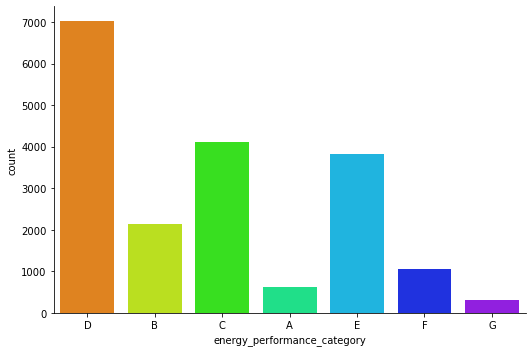

In [190]:
plt.figure(figsize= (14,6))
sns.factorplot(x = 'energy_performance_category', data = X_train, kind = 'count', aspect= 1.5, palette = 'gist_rainbow' )

<Figure size 1008x432 with 0 Axes>

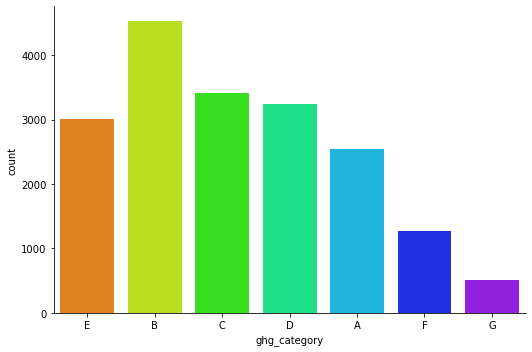

In [191]:
plt.figure(figsize= (14,6))
sns.factorplot(x = 'ghg_category', data = X_train, kind = 'count', aspect= 1.5, palette = 'gist_rainbow' )

In [ ]:
plt.figure(figsize= (14,6))
sns.factorplot(x = 'exposition', data = X_train, kind = 'count', aspect= 1.5, palette = 'gist_rainbow' )

In [63]:
# Separation of numeric and categorical features
num_features = ['approximate_latitude', 'approximate_longitude', 'size', 'floor', 'land_size', 'ghg_value', 'nb_rooms',
               'nb_bedrooms', 'nb_parking_places', 'nb_boxes', 'nb_photos', 'has_a_balcony', 'nb_terraces', 'has_a_cellar',
               'has_a_garage', 'has_air_conditioning', 'last_floor', 'upper_floors']
cat_features = ['property_type', 'city_tranforme', 'energy_performance_category', 'ghg_category', 'exposition']
drop_features = ["postal_code", 'city']

In [230]:
len(cat_features)

5

In [219]:
X_train['exposition'].unique()

array([nan, 'Sud', 'Sud-Est', 'Ouest', 'Nord-Est', 'Est-Ouest',
       'Sud-Ouest', 'Est', 'Nord-Ouest', 'Sud-Nord', 'Nord', 'Ouest-Est',
       'Nord-Sud'], dtype=object)

In [233]:
X_test.shape[1]

27

### Load and preprocess images matrix data

In [198]:
# Images files
my_file = "C:/Users/modfa/Documents/NEOMA/Machine Learning and AI/Group Project/data/reduced_images_ILB.zip"

from zipfile import ZipFile
zip = ZipFile(my_file)

list_im = zip.namelist()
test_data = []
train_data = []
with zipfile.ZipFile(my_file, 'r') as zfile:
    for i in list_im :
        if ".jpg" in i and '/test' in i:
            test_data.append(i)  
        elif ".jpg" in i and '/train' in i :
            train_data.append(i) 

In [199]:
def transform_to_vector(path_image):
    with zipfile.ZipFile(my_file, 'r') as zfile:
        data = zfile.read(path_image)
    img = cv2.imdecode(np.frombuffer(data, np.uint8), 1)
    return {path_image : img}

In [200]:
def give_list_images(start_indice, list_image_name):
    list_image = list(range(start_indice,len(list_image_name), 6))
    list_image_test = [transform_to_vector(values) for (i, values) in enumerate(list_image_name)
                               if i in list_image]
    return list_image_test
    

In [232]:
def transform_to_df_train_image(start_ind, train_data):
    data_im = give_list_images(1, train_data)
    df = pd.DataFrame(data_im).T
    list_index = [df.index[i][25 : 33] for i in range(df.shape[0])]
    df.index = list_index
    return df

In [237]:
def transform_to_df_test_image(start_ind, test_data):
    data_im = give_list_images(1, test_data)
    df = pd.DataFrame(data_im).T
    list_index = [df.index[i][24 : 32] for i in range(df.shape[0])]
    df.index = list_index
    return df

### image train data

In [235]:
df_train_im_sample = transform_to_df(1, train_data[ : 100])
df_train_im_sample

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
10767060,"[[[78, 99, 96], [78, 99, 96], [78, 99, 96], [7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10888487,NaN,"[[[145, 159, 171], [146, 160, 172], [151, 163,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10914429,NaN,NaN,"[[[70, 104, 127], [65, 99, 122], [56, 93, 115]...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11308684,NaN,NaN,NaN,"[[[164, 163, 153], [160, 161, 152], [160, 159,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11549723,NaN,NaN,NaN,NaN,"[[[238, 219, 206], [239, 220, 207], [244, 224,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11965095,NaN,NaN,NaN,NaN,NaN,"[[[227, 194, 161], [227, 194, 161], [225, 194,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12090080,NaN,NaN,NaN,NaN,NaN,NaN,"[[[94, 115, 106], [173, 192, 183], [137, 152, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12123019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[251, 245, 232], [251, 245, 232], [251, 246,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12230262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[253, 254, 255], [253, 254, 255], [253, 254,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12243776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[105, 122, 143], [106, 123, 144], [112, 125,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


### image test data

In [ ]:
df_test_im_sample = transform_to_df_test_image(0, test_data)
df_test_im_sample

### Preprocessing Pipeline Numerical and  categorical data

In [70]:
# Methode pour effectuer le preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline

In [72]:
cat_features_process = make_pipeline(SimpleImputer(strategy = "constant", fill_value = "Unknown"),
                                     OneHotEncoder(sparse=False, handle_unknown = 'ignore'))
num_features_process = SimpleImputer(strategy = "constant", fill_value = 0)# median value
features_process = make_column_transformer((cat_features_process , cat_features),
                                       (num_features_process, num_features))

### Cross validation K-Fold

In [73]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
kfold = KFold(n_splits = 5, shuffle = False, random_state = None)

### Random Forest Model

In [74]:
from sklearn.ensemble import RandomForestRegressor

rf = {}

rf['pipeline'] = Pipeline([ ( 'Preprocessing', features_process),
                          ('rf' , RandomForestRegressor(random_state = 100, n_jobs = -1))])

In [192]:
# Dictionary containing the values of the hyperparameters to be tested
rf['hyperparametres'] = {}
rf['hyperparametres']['rf__max_features'] = ["auto", "sqrt"]
rf['hyperparametres']['rf__n_estimators'] = [50, 100, 300, 500]
rf['hyperparametres']['rf__max_depth'] = [30, 70, None]

In [193]:
# Grille for the random forest model
rf['gridsearch'] = GridSearchCV(estimator = rf['pipeline'], 
                                param_grid = rf['hyperparametres'], 
                                scoring = 'neg_mean_absolute_error',
                                cv = kfold)

In [194]:
rf['gridsearch'].fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('Preprocessing',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='Unknown',
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                       

In [205]:
def Parametres_scores(x):
    
    means = x.cv_results_['mean_test_score']
    stds = x.cv_results_['std_test_score']

    for mean, std, params in zip(means, stds, x.cv_results_['params']):
        print(f'MAE : {round(mean, 3)} (std : +/- {round(std*2, 3)}) for {params}')

In [206]:
Parametres_scores(rf['gridsearch'])

MAE : -90864.852 (std : +/- 1813.824) for {'rf__max_features': 'auto', 'rf__n_estimators': 50}
MAE : -90214.759 (std : +/- 1937.153) for {'rf__max_features': 'auto', 'rf__n_estimators': 100}
MAE : -89729.13 (std : +/- 1753.778) for {'rf__max_features': 'auto', 'rf__n_estimators': 300}
MAE : -89611.677 (std : +/- 1723.209) for {'rf__max_features': 'auto', 'rf__n_estimators': 500}
MAE : -107601.369 (std : +/- 3140.542) for {'rf__max_features': 'sqrt', 'rf__n_estimators': 50}
MAE : -106494.189 (std : +/- 2987.611) for {'rf__max_features': 'sqrt', 'rf__n_estimators': 100}
MAE : -105779.647 (std : +/- 2725.685) for {'rf__max_features': 'sqrt', 'rf__n_estimators': 300}
MAE : -105646.471 (std : +/- 2602.214) for {'rf__max_features': 'sqrt', 'rf__n_estimators': 500}


In [207]:
print(f"Best Params: {rf['gridsearch'].best_params_}\nBest score : {rf['gridsearch'].best_score_} ")

Best Params: {'rf__max_features': 'auto', 'rf__n_estimators': 500}
Best score : -89611.67706660856 


In [208]:
print(f"Best score : {rf['gridsearch'].best_score_}")

Best score : -89611.67706660856


In [204]:
model_rf  = rf['gridsearch'].best_estimator_.fit(X_train, y_train)

In [200]:
model_rf

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['property_type',
                                                   'city_tranforme',
                                                   'energy_performance_category',
                                                   'ghg_category',
                                      

In [231]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

y_pred = model_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print(f'mse = {mse}\nrmse = {rmse}\nmae = {mae}\nexplained_var = {explained_var}\nr2_score = {r2_score}')

mse = 173892807972.02545
rmse = 417004.56588870275
mae = 336462.5131258023
explained_var = -0.8151823133444938
r2_score = -1.111698527950669


In [210]:
def funct_predict() :
    id_and_pred = [(id_annonce , pred) for id_annonce, pred in zip(X_test.index, y_pred)]
    df_resultat = pd.DataFrame(id_and_pred)
    df_resultat.columns = ['id_annone', 'y_pred']
    df_resultat.set_index('id_annone', inplace = True)
    return df_resultat


In [211]:
df_resultat = funct_predict()
df_resultat

,y_pred
id_annone,
35160615,206652.000
35830639,893737.058
36016657,621592.816
35759225,250481.110
35252229,1001796.400
...,...
36052217,501538.232
35823719,245514.380
35793053,309185.336


In [212]:
def_pred_test_value = pd.merge(df_resultat, y_test, left_index=True, right_index=True)
def_pred_test_value 

,y_pred,price
35160615,206652.000,441826.270071
35830639,893737.058,887845.560585
36016657,621592.816,839651.416415
35759225,250481.110,331880.957565
35252229,1001796.400,983554.427751
...,...,...
36052217,501538.232,96685.721059
35823719,245514.380,293068.910553
35793053,309185.336,160826.069291
36049283,344301.098,361381.988840


In [151]:
df_resultat.to_csv('real_state_predict_price.csv', sep=';', index = True)

### Gradient Boosting methods

In [167]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

gb = {}

gb['Pipeline'] = Pipeline([ ('preprocessing' , features_process),
                          ( 'gb', HistGradientBoostingRegressor(random_state = 100))])

gb['Hyperparametres'] = {}
gb['Hyperparametres']['gb__min_samples_leaf'] = [10, 20, 50]
gb['Hyperparametres']['gb__max_leaf_nodes'] = [31, 50, 100]
gb['Hyperparametres']['gb__learning_rate'] = [0.01, 0.1, 1]

In [168]:
# Grille pour le gb
gb['gridsearch'] = GridSearchCV(estimator = gb['Pipeline'], 
                                param_grid = gb['Hyperparametres'], 
                                scoring = 'neg_mean_absolute_error',
                                cv = kfold)

In [169]:
gb['gridsearch'].fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='Unknown',
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                       

In [170]:
Parametres_scores(gb['gridsearch'])

MAE : -151166.198 (std : +/- 4310.046) for {'gb__learning_rate': 0.01, 'gb__max_leaf_nodes': 31, 'gb__min_samples_leaf': 10}
MAE : -151140.997 (std : +/- 4396.227) for {'gb__learning_rate': 0.01, 'gb__max_leaf_nodes': 31, 'gb__min_samples_leaf': 20}
MAE : -151074.342 (std : +/- 4445.506) for {'gb__learning_rate': 0.01, 'gb__max_leaf_nodes': 31, 'gb__min_samples_leaf': 50}
MAE : -145903.345 (std : +/- 3842.032) for {'gb__learning_rate': 0.01, 'gb__max_leaf_nodes': 50, 'gb__min_samples_leaf': 10}
MAE : -145796.25 (std : +/- 3862.309) for {'gb__learning_rate': 0.01, 'gb__max_leaf_nodes': 50, 'gb__min_samples_leaf': 20}
MAE : -145723.263 (std : +/- 3866.615) for {'gb__learning_rate': 0.01, 'gb__max_leaf_nodes': 50, 'gb__min_samples_leaf': 50}
MAE : -139774.817 (std : +/- 3328.117) for {'gb__learning_rate': 0.01, 'gb__max_leaf_nodes': 100, 'gb__min_samples_leaf': 10}
MAE : -139422.256 (std : +/- 3413.342) for {'gb__learning_rate': 0.01, 'gb__max_leaf_nodes': 100, 'gb__min_samples_leaf': 20}

In [171]:
print(f"Best Params: {gb['gridsearch'].best_params_}\nBest score : {gb['gridsearch'].best_score_} ")

Best Params: {'gb__learning_rate': 0.1, 'gb__max_leaf_nodes': 100, 'gb__min_samples_leaf': 20}
Best score : -88266.70048136404 


In [172]:
model_gb  = gb['gridsearch'].best_estimator_.fit(X_train, y_train)

In [173]:
model_gb

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['property_type',
                                                   'city_tranforme',
                                                   'energy_performance_category',
                                                   'ghg_category',
                                      

In [183]:
y_pred_gb = model_gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae = mean_absolute_error(y_test, y_pred_gb)
explained_var = explained_variance_score(y_test, y_pred_gb)
print(f'mse = {mse}\nrmse = {rmse}\nmae = {mae}\nexplained_var = {explained_var}')

mse = 177860153332.58493
rmse = 421734.6954337347
mae = 339686.8507366866
explained_var = -0.8483365965778518


### ANN

In [152]:
# Appliquer le processing sur les donnees
x_train_process = features_process.fit_transform(X_train)
x_test_process = features_process.transform(X_test)

In [232]:
x_train_process.shape[1],

(76,)

In [160]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor = "loss" , patience = 5)
model = Sequential()
model.add(Dense(x_train_process.shape[1], activation = "relu"))
model.add(Dense(x_train_process.shape[1], activation = "relu"))
model.add(Dense(x_train_process.shape[1], activation = "relu"))
model.add(Dense(1))
model.compile(optimizer = "adam", loss = 'mae' )


In [161]:
model.fit(x = x_train_process, y = y_train, validation_data = (x_test_process, y_test),
          batch_size = 128, epochs = 700 , callbacks = [callback])

Epoch 1/700
292/292 [==============================] - 1s 3ms/step - loss: 324493.8438 - val_loss: 472362.9688
Epoch 2/700
292/292 [==============================] - 1s 2ms/step - loss: 304208.2500 - val_loss: 439727.8750
Epoch 3/700
292/292 [==============================] - 1s 2ms/step - loss: 220365.6250 - val_loss: 317537.1875
Epoch 4/700
292/292 [==============================] - 1s 2ms/step - loss: 187940.3906 - val_loss: 326062.0000
Epoch 5/700
292/292 [==============================] - 1s 2ms/step - loss: 187219.4688 - val_loss: 313342.8438
Epoch 6/700
292/292 [==============================] - 1s 2ms/step - loss: 183642.3125 - val_loss: 307060.2812
Epoch 7/700
292/292 [==============================] - 1s 2ms/step - loss: 180249.0469 - val_loss: 313302.0000
Epoch 8/700
292/292 [==============================] - 1s 2ms/step - loss: 182851.1875 - val_loss: 310811.5312
Epoch 9/700
292/292 [==============================] - 1s 2ms/step - loss: 180440.0781 - val_loss: 309483.9375
E

292/292 [==============================] - 1s 2ms/step - loss: 142692.2031 - val_loss: 326504.2500
Epoch 74/700
292/292 [==============================] - 1s 2ms/step - loss: 146957.2812 - val_loss: 333109.6875
Epoch 75/700
292/292 [==============================] - 1s 2ms/step - loss: 142507.0000 - val_loss: 327002.4688
Epoch 76/700
292/292 [==============================] - 1s 2ms/step - loss: 141723.8594 - val_loss: 325151.0938
Epoch 77/700
292/292 [==============================] - 1s 2ms/step - loss: 144975.5469 - val_loss: 328702.0312
Epoch 78/700
292/292 [==============================] - 1s 3ms/step - loss: 142687.8594 - val_loss: 324024.5312
Epoch 79/700
292/292 [==============================] - 1s 2ms/step - loss: 140881.1406 - val_loss: 326763.9062
Epoch 80/700
292/292 [==============================] - 1s 2ms/step - loss: 142281.5938 - val_loss: 328840.3438
Epoch 81/700
292/292 [==============================] - 1s 3ms/step - loss: 141382.9219 - val_loss: 339432.9375
Epoch

Text(0.5, 1.0, 'Training and Validation Loss')

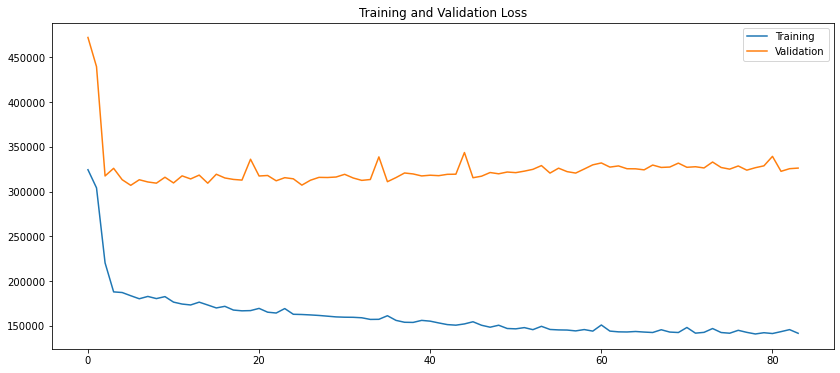

In [166]:
plt.figure(figsize= (14,6))
plt.plot(model.history.history['loss'], label='Training')
plt.plot(model.history.history['val_loss'], label='Validation')
plt.legend()
plt.title('Training and Validation Loss')


In [185]:
y_pred_nn = model.predict(x_test_process)

In [186]:
mse = mean_squared_error(y_test, y_pred_nn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_nn))
mae = mean_absolute_error(y_test, y_pred_nn)
explained_var = explained_variance_score(y_test, y_pred_nn)
print(f'mse = {mse}\nrmse = {rmse}\nmae = {mae}\nexplained_var = {explained_var}')

mse = 162016959399.5671
rmse = 402513.3033820958
mae = 326328.46562957997
explained_var = -0.4213177642654906
